In [364]:
import numpy as np
import pandas as pd

income = pd.read_csv("FL_income_by_county.csv")
income.columns = income.iloc[3]
income = income.iloc[4:].reset_index(drop=True)
income = income.drop(0).reset_index(drop=True)
income = income.drop('Confidential Flag', axis=1)
income.rename(columns={'Employment': 'Employment-Jan-23'}, inplace=True)
income.columns.values[income.columns.get_loc(np.nan)] = 'Employment-Feb-23'
columns = income.columns.tolist()
columns[columns.index('Employment-Feb-23', columns.index('Employment-Feb-23') + 1)] = 'Employment-Mar-23'
income.columns = columns
income

,Year,Qtr,Area Type,County Code,Ownership Code,Industry Title,NAICS Code,Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage
0,2023,1,Cty,001,0,Total All Industries,10,"8,195","137,127","138,405","138,054","$2,042,891,930","137,862","$14,818"
1,2023,1,Cty,001,0,Goods Producing,101,965,"11,481","11,506","11,584","$167,896,251","11,524","$14,570"
2,2023,1,Cty,001,0,Natural Resources and Mining,1011,102,"1,420","1,450","1,624","$13,141,945","1,498","$8,773"
3,2023,1,Cty,001,0,"Agriculture, Forestry, Fishing and Hunting",11,99,"1,386","1,416","1,589","$12,454,945","1,464","$8,509"
4,2023,1,Cty,001,0,Crop Production,111,52,"1,193","1,214","1,387","$10,459,063","1,265","$8,270"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2023,1,Cty,999,5,"Religious, Grantmaking, Civic, Professional, a...",813,771,850,889,886,"$22,030,818",875,"$25,178"
19676,2023,1,Cty,999,5,Private Households,814,151,163,160,158,"$2,618,987",160,"$16,335"
19677,2023,1,Cty,999,5,Unclassified,1029,"14,059","5,708","5,929","6,132","$142,764,168","5,923","$24,103"
19678,2023,1,Cty,999,5,Unclassified,99,"14,059","5,708","5,929","6,132","$142,764,168","5,923","$24,103"


In [365]:
county_codes = pd.read_csv("FL_county_codes.csv")
county_codes = county_codes.iloc[:, :2]
county_codes

,CTYFIPS,NAME
0,1,Alachua
1,3,Baker
2,5,Bay
3,7,Bradford
4,9,Brevard
...,...,...
66,133,Washington
67,995,Statewide
68,996,Out of the Country
69,998,Out of State


In [366]:
nan_count_per_column = income.isnull().sum()
print("Number of NaN values per column:")
print(nan_count_per_column)


Number of NaN values per column:
Year                          0
Qtr                           0
Area Type                     0
County Code                   0
Ownership Code                0
Industry Title                0
NAICS Code                    0
Reporting Units               0
Employment-Jan-23             0
Employment-Feb-23             0
Employment-Mar-23             0
Total Wages                   0
Average Monthly Employment    0
Average Quarterly Wage        0
dtype: int64


In [367]:
income['County Code'] = income['County Code'].astype(str).str.lstrip('0')
income

,Year,Qtr,Area Type,County Code,Ownership Code,Industry Title,NAICS Code,Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage
0,2023,1,Cty,1,0,Total All Industries,10,"8,195","137,127","138,405","138,054","$2,042,891,930","137,862","$14,818"
1,2023,1,Cty,1,0,Goods Producing,101,965,"11,481","11,506","11,584","$167,896,251","11,524","$14,570"
2,2023,1,Cty,1,0,Natural Resources and Mining,1011,102,"1,420","1,450","1,624","$13,141,945","1,498","$8,773"
3,2023,1,Cty,1,0,"Agriculture, Forestry, Fishing and Hunting",11,99,"1,386","1,416","1,589","$12,454,945","1,464","$8,509"
4,2023,1,Cty,1,0,Crop Production,111,52,"1,193","1,214","1,387","$10,459,063","1,265","$8,270"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2023,1,Cty,999,5,"Religious, Grantmaking, Civic, Professional, a...",813,771,850,889,886,"$22,030,818",875,"$25,178"
19676,2023,1,Cty,999,5,Private Households,814,151,163,160,158,"$2,618,987",160,"$16,335"
19677,2023,1,Cty,999,5,Unclassified,1029,"14,059","5,708","5,929","6,132","$142,764,168","5,923","$24,103"
19678,2023,1,Cty,999,5,Unclassified,99,"14,059","5,708","5,929","6,132","$142,764,168","5,923","$24,103"


In [368]:
income.dtypes

Year                          object
Qtr                           object
Area Type                     object
County Code                   object
Ownership Code                object
Industry Title                object
NAICS Code                    object
Reporting Units               object
Employment-Jan-23             object
Employment-Feb-23             object
Employment-Mar-23             object
Total Wages                   object
Average Monthly Employment    object
Average Quarterly Wage        object
dtype: object

In [369]:
columns_to_convert = ['Year', 'Qtr', 'County Code', 'Ownership Code', 'Reporting Units', 
                       'Employment-Jan-23', 'Employment-Feb-23', 'Employment-Mar-23', 'Total Wages', 
                       'Average Monthly Employment', 'Average Quarterly Wage']

income[columns_to_convert] = income[columns_to_convert].astype(str)
income['Total Wages'] = income['Total Wages'].str.replace('$', '')
income['Average Quarterly Wage'] = income['Average Quarterly Wage'].str.replace('$', '')

for col in columns_to_convert:
    income[col] = pd.to_numeric(income[col].str.replace(',', ''), errors='coerce')
income

C:\Users\danie\AppData\Local\Temp\ipykernel_35692\1857363060.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income['Total Wages'] = income['Total Wages'].str.replace('$', '')
C:\Users\danie\AppData\Local\Temp\ipykernel_35692\1857363060.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income['Average Quarterly Wage'] = income['Average Quarterly Wage'].str.replace('$', '')


,Year,Qtr,Area Type,County Code,Ownership Code,Industry Title,NAICS Code,Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage
0,2023,1,Cty,1,0,Total All Industries,10,8195,137127.0,138405.0,138054.0,2.042892e+09,137862.0,14818.0
1,2023,1,Cty,1,0,Goods Producing,101,965,11481.0,11506.0,11584.0,1.678963e+08,11524.0,14570.0
2,2023,1,Cty,1,0,Natural Resources and Mining,1011,102,1420.0,1450.0,1624.0,1.314194e+07,1498.0,8773.0
3,2023,1,Cty,1,0,"Agriculture, Forestry, Fishing and Hunting",11,99,1386.0,1416.0,1589.0,1.245494e+07,1464.0,8509.0
4,2023,1,Cty,1,0,Crop Production,111,52,1193.0,1214.0,1387.0,1.045906e+07,1265.0,8270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2023,1,Cty,999,5,"Religious, Grantmaking, Civic, Professional, a...",813,771,850.0,889.0,886.0,2.203082e+07,875.0,25178.0
19676,2023,1,Cty,999,5,Private Households,814,151,163.0,160.0,158.0,2.618987e+06,160.0,16335.0
19677,2023,1,Cty,999,5,Unclassified,1029,14059,5708.0,5929.0,6132.0,1.427642e+08,5923.0,24103.0
19678,2023,1,Cty,999,5,Unclassified,99,14059,5708.0,5929.0,6132.0,1.427642e+08,5923.0,24103.0


In [370]:
merged_df = income.merge(county_codes, left_on='County Code', right_on='CTYFIPS', how='left')
merged_df

,Year,Qtr,Area Type,County Code,Ownership Code,Industry Title,NAICS Code,Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage,CTYFIPS,NAME
0,2023,1,Cty,1,0,Total All Industries,10,8195,137127.0,138405.0,138054.0,2.042892e+09,137862.0,14818.0,1,Alachua
1,2023,1,Cty,1,0,Goods Producing,101,965,11481.0,11506.0,11584.0,1.678963e+08,11524.0,14570.0,1,Alachua
2,2023,1,Cty,1,0,Natural Resources and Mining,1011,102,1420.0,1450.0,1624.0,1.314194e+07,1498.0,8773.0,1,Alachua
3,2023,1,Cty,1,0,"Agriculture, Forestry, Fishing and Hunting",11,99,1386.0,1416.0,1589.0,1.245494e+07,1464.0,8509.0,1,Alachua
4,2023,1,Cty,1,0,Crop Production,111,52,1193.0,1214.0,1387.0,1.045906e+07,1265.0,8270.0,1,Alachua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2023,1,Cty,999,5,"Religious, Grantmaking, Civic, Professional, a...",813,771,850.0,889.0,886.0,2.203082e+07,875.0,25178.0,999,Unknown
19676,2023,1,Cty,999,5,Private Households,814,151,163.0,160.0,158.0,2.618987e+06,160.0,16335.0,999,Unknown
19677,2023,1,Cty,999,5,Unclassified,1029,14059,5708.0,5929.0,6132.0,1.427642e+08,5923.0,24103.0,999,Unknown
19678,2023,1,Cty,999,5,Unclassified,99,14059,5708.0,5929.0,6132.0,1.427642e+08,5923.0,24103.0,999,Unknown


In [371]:
nan_count_per_column = merged_df.isnull().sum()
print("Number of NaN values per column:")
print(nan_count_per_column)

Number of NaN values per column:
Year                             0
Qtr                              0
Area Type                        0
County Code                      0
Ownership Code                   0
Industry Title                   0
NAICS Code                       0
Reporting Units                  0
Employment-Jan-23             2679
Employment-Feb-23             2679
Employment-Mar-23             2679
Total Wages                   2679
Average Monthly Employment    2679
Average Quarterly Wage        2679
CTYFIPS                          0
NAME                             0
dtype: int64


In [372]:
merged_df = merged_df.dropna()
#ownership code = 0 means total for all ownerships
merged_df = merged_df[merged_df['Industry Title'] == 'Total All Industries']
merged_df = merged_df[merged_df['Ownership Code'] == 0]

merged_df

,Year,Qtr,Area Type,County Code,Ownership Code,Industry Title,NAICS Code,Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage,CTYFIPS,NAME
0,2023,1,Cty,1,0,Total All Industries,10,8195,137127.0,138405.0,138054.0,2.042892e+09,137862.0,14818.0,1,Alachua
321,2023,1,Cty,3,0,Total All Industries,10,506,7510.0,7604.0,7644.0,7.816638e+07,7586.0,10304.0,3,Baker
551,2023,1,Cty,5,0,Total All Industries,10,6619,78287.0,79384.0,80634.0,1.016102e+09,79435.0,12792.0,5,Bay
889,2023,1,Cty,7,0,Total All Industries,10,557,6210.0,6182.0,6192.0,7.113208e+07,6195.0,11483.0,7,Bradford
1118,2023,1,Cty,9,0,Total All Industries,10,18712,236063.0,236734.0,236883.0,3.962362e+09,236560.0,16750.0,9,Brevard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18497,2023,1,Cty,133,0,Total All Industries,10,528,5936.0,5981.0,5997.0,6.441000e+07,5971.0,10787.0,133,Washington
18735,2023,1,Cty,995,0,Total All Industries,10,17330,369498.0,373316.0,373429.0,1.092675e+10,372081.0,29367.0,995,Statewide
19061,2023,1,Cty,996,0,Total All Industries,10,5,10.0,18.0,15.0,8.321710e+05,14.0,58058.0,996,Out of the Country
19098,2023,1,Cty,998,0,Total All Industries,10,3686,21228.0,21440.0,21365.0,6.993057e+08,21344.0,32763.0,998,Out of State


In [373]:
branch_data = pd.read_csv("branch_data.csv")
filtered_branch_data = branch_data[~branch_data['BranchCategory'].str.contains('High School')]
#Create column for total transcations of a row
filtered_branch_data['Total_Transactions'] = filtered_branch_data[['ATM', 'Bill Payment', 'Cash', 'Draft', 'ACH', 'Fee', 'Credit/Debit Card', 'Home Banking', 'Dividend']].sum(axis=1)
print(filtered_branch_data['BranchCategory'].unique())


['Addition Financial Arena' 'Altamonte Springs' 'Apopka' 'Clermont'
 'Downtown Campus' 'East Orlando' 'Eustis' 'Fern Park' 'Kissimmee'
 'Lake Mary' 'Lake Nona' 'Leesburg' 'Longwood' 'Merritt Island'
 'MetroWest' 'Mills' 'Orange City' 'Oviedo' 'Pine Hills' 'Poinciana'
 'Sanford' 'Seminole State' 'South Orlando' 'St. Cloud' 'The Loop'
 'UCF Campus' 'UCF Commons' 'Virtual Branch' 'Winter Garden']


C:\Users\danie\AppData\Local\Temp\ipykernel_35692\3183677653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branch_data['Total_Transactions'] = filtered_branch_data[['ATM', 'Bill Payment', 'Cash', 'Draft', 'ACH', 'Fee', 'Credit/Debit Card', 'Home Banking', 'Dividend']].sum(axis=1)


In [374]:
branch_category_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}

filtered_branch_data['County'] = filtered_branch_data['BranchCategory'].map(branch_category_mapping)
demand_change_full = pd.read_csv("demand_change_full.csv")
demand_change_last_6_months = pd.read_csv("demand_change_last_6_months.csv")
demand_change_full.rename(columns={'0': 'Demand Change (Full)'}, inplace=True)
demand_change_last_6_months.rename(columns={'0': 'Demand Change (Last 6 Months)'}, inplace=True)
filtered_branch_data = pd.merge(filtered_branch_data, demand_change_full, left_on='BranchCategory',right_on='BranchCategory', how='inner')
filtered_branch_data = pd.merge(filtered_branch_data, demand_change_last_6_months, left_on='BranchCategory',right_on='BranchCategory', how='inner')
# Convert 'EOM TRANS DATE' to a datetime object for date-based operations
filtered_branch_data['EOM_TRANS_DATE'] = pd.to_datetime(filtered_branch_data['EOM_TRANS_DATE'])
monthly_demand_change = pd.read_csv('monthly_demand_change.csv')
monthly_demand_change.fillna(0, inplace=True)
monthly_demand_change = monthly_demand_change.drop('EOM_TRANS_DATE', axis = 1)
monthly_demand_change = monthly_demand_change.drop('Virtual Branch', axis = 1)


C:\Users\danie\AppData\Local\Temp\ipykernel_35692\1369831798.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branch_data['County'] = filtered_branch_data['BranchCategory'].map(branch_category_mapping)


Addition financial and ucf commons are not full, addressed later

In [375]:
df = pd.merge(filtered_branch_data, merged_df, left_on='County', right_on='NAME', how='inner')
df_relevant = df.drop(['EOM_TRANS_DATE','Year','Qtr','Area Type','County Code','Ownership Code','Industry Title','NAICS Code','CTYFIPS','NAME'],axis = 1)
df_relevant

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,...,County,Demand Change (Full),Demand Change (Last 6 Months),Reporting Units,Employment-Jan-23,Employment-Feb-23,Employment-Mar-23,Total Wages,Average Monthly Employment,Average Quarterly Wage
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,...,Orange,-0.119844,-0.092593,55237,920266.0,927785.0,930444.0,1.552114e+10,926165.0,16759.0
1,Addition Financial Arena,1,0,0,18,8,24,14,0,13,...,Orange,-0.119844,-0.092593,55237,920266.0,927785.0,930444.0,1.552114e+10,926165.0,16759.0
2,Addition Financial Arena,1,0,0,25,2,19,6,2,13,...,Orange,-0.119844,-0.092593,55237,920266.0,927785.0,930444.0,1.552114e+10,926165.0,16759.0
3,Addition Financial Arena,0,1,0,18,0,16,5,0,12,...,Orange,-0.119844,-0.092593,55237,920266.0,927785.0,930444.0,1.552114e+10,926165.0,16759.0
4,Addition Financial Arena,0,0,0,20,2,15,5,1,9,...,Orange,-0.119844,-0.092593,55237,920266.0,927785.0,930444.0,1.552114e+10,926165.0,16759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Poinciana,128,138,78,289,460,403,1480,541,2137,...,Polk,0.015253,0.026942,18189,257003.0,258792.0,259008.0,3.479223e+09,258268.0,13471.0
518,Poinciana,99,105,0,260,0,379,1474,290,2148,...,Polk,0.015253,0.026942,18189,257003.0,258792.0,259008.0,3.479223e+09,258268.0,13471.0
519,Poinciana,92,165,86,338,691,381,1393,473,2230,...,Polk,0.015253,0.026942,18189,257003.0,258792.0,259008.0,3.479223e+09,258268.0,13471.0
520,Poinciana,122,221,90,304,454,427,1495,519,2256,...,Polk,0.015253,0.026942,18189,257003.0,258792.0,259008.0,3.479223e+09,258268.0,13471.0


In [376]:
# Names of columns to mask
columns_to_mask = ['Addition Financial Arena', 'UCF Commons']

# Create a mask for the last 5 rows of specified columns
mask = pd.DataFrame(False, index=monthly_demand_change.index, columns=monthly_demand_change.columns)
mask.iloc[-5:, monthly_demand_change.columns.get_loc(columns_to_mask[0])] = True
mask.iloc[-5:, monthly_demand_change.columns.get_loc(columns_to_mask[1])] = True

# Initialize an empty list to store the flattened values
filtered_values = []

# Iterate over the DataFrame and append values to the list with the mask applied
for column in monthly_demand_change.columns:
    filtered_values.extend(monthly_demand_change.loc[~mask[column], column])
# Add a new column 'Monthly Demand Change' to 'filtered_branch_data'
df_relevant['Monthly Demand Change'] = filtered_values

In [377]:
print(df_relevant)

               BranchCategory  ATM  Bill Payment  Cash  Draft  ACH  Fee  \
0    Addition Financial Arena    0             3     0     28    5   20   
1    Addition Financial Arena    1             0     0     18    8   24   
2    Addition Financial Arena    1             0     0     25    2   19   
3    Addition Financial Arena    0             1     0     18    0   16   
4    Addition Financial Arena    0             0     0     20    2   15   
..                        ...  ...           ...   ...    ...  ...  ...   
517                 Poinciana  128           138    78    289  460  403   
518                 Poinciana   99           105     0    260    0  379   
519                 Poinciana   92           165    86    338  691  381   
520                 Poinciana  122           221    90    304  454  427   
521                 Poinciana   96           168    56    348  831  431   

     Credit/Debit Card  Home Banking  Dividend  ...  Demand Change (Full)  \
0                    6

Model Accuracy: 0.9238095238095239
                       Feature  Importance
8                     Dividend    0.165100
5                          Fee    0.132194
9           Total_Transactions    0.112175
0                          ATM    0.070745
6            Credit/Debit Card    0.065065
7                 Home Banking    0.056306
1                 Bill Payment    0.049399
3                        Draft    0.048320
12           Employment-Feb-23    0.031532
2                         Cash    0.026081
10             Reporting Units    0.025523
14                 Total Wages    0.025341
15  Average Monthly Employment    0.024848
11           Employment-Jan-23    0.023482
16      Average Quarterly Wage    0.023021
13           Employment-Mar-23    0.022174
4                          ACH    0.018931
18              County_Brevard    0.017510
17       Monthly Demand Change    0.016523
24              County_Volusia    0.011707
23             County_Seminole    0.011204
19                 

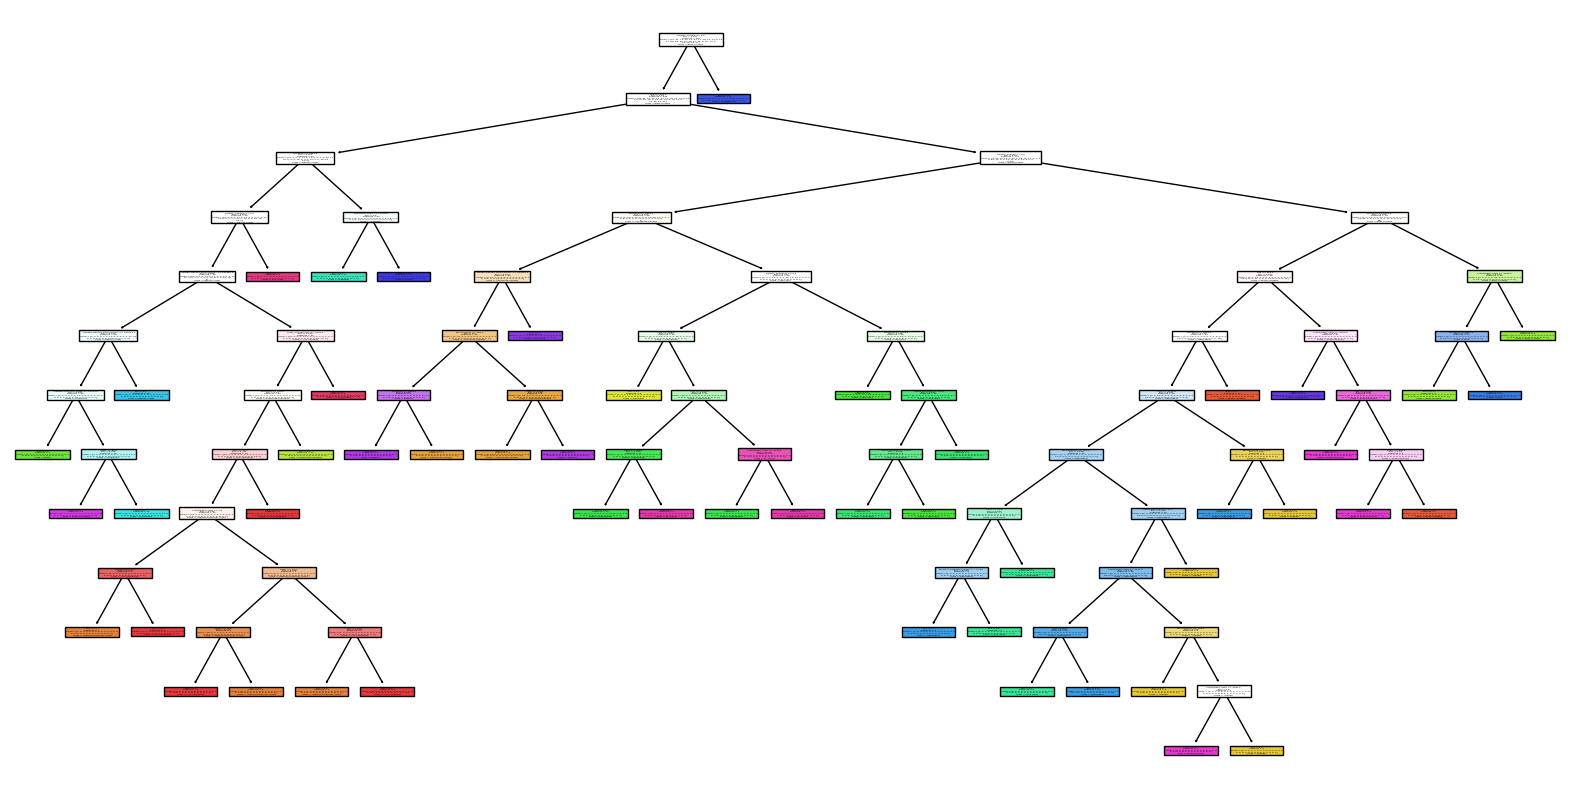

In [378]:
#the following are random forest classifier models with branchCategory as the response, we ignore the overall demand change
#features since each instance of a branch category has the exact same one
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Assuming 'df_relevant' is your DataFrame

# Dummy encode the 'County' column
df_encoded = pd.get_dummies(df_relevant, columns=['County'], drop_first=False)

# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_encoded['BranchCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)
# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, class_names=model.classes_)
plt.show()

In [379]:
#Same model but without 'County', so we use the df without dummy encoding
# Split the data into features (X) and response variable (y)
X = df_relevant.drop(['BranchCategory','County','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_relevant['BranchCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Model Accuracy: 0.9142857142857143
                       Feature  Importance
8                     Dividend    0.183849
5                          Fee    0.144788
9           Total_Transactions    0.114081
6            Credit/Debit Card    0.065990
0                          ATM    0.061603
7                 Home Banking    0.050159
3                        Draft    0.045511
1                 Bill Payment    0.042214
10             Reporting Units    0.041782
13           Employment-Mar-23    0.036377
16      Average Quarterly Wage    0.035643
11           Employment-Jan-23    0.034628
14                 Total Wages    0.031482
12           Employment-Feb-23    0.030390
15  Average Monthly Employment    0.029074
2                         Cash    0.021433
4                          ACH    0.017781
17       Monthly Demand Change    0.013215


In [380]:
#k-fold cross validation with 'county'
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_encoded['BranchCategory']

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Accuracy for each fold: [0.94339623 0.94339623 0.94230769 1.         0.96153846 0.92307692
 0.92307692 0.98076923 0.96153846 0.98076923]
Average Accuracy: 0.9559869375907111
                       Feature  Importance
8                     Dividend    0.170253
5                          Fee    0.138585
9           Total_Transactions    0.108369
6            Credit/Debit Card    0.069576
0                          ATM    0.066509
7                 Home Banking    0.053980
3                        Draft    0.048998
1                 Bill Payment    0.037221
11           Employment-Jan-23    0.028924
13           Employment-Mar-23    0.027597
15  Average Monthly Employment    0.026072
12           Employment-Feb-23    0.025961
2                         Cash    0.024038
16      Average Quarterly Wage    0.023330
14                 Total Wages    0.021827
10             Reporting Units    0.019705
4                          ACH    0.019416
17       Monthly Demand Change    0.015882
24       

In [381]:
#k-fold cross validation without 'county'
# Split the data into features (X) and response variable (y)
X = df_relevant.drop(['BranchCategory','County','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_relevant['BranchCategory']
# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Accuracy for each fold: [0.9245283  0.94339623 0.94230769 0.98076923 0.98076923 0.92307692
 0.96153846 0.98076923 0.98076923 0.98076923]
Average Accuracy: 0.9598693759071116
                       Feature  Importance
8                     Dividend    0.183156
5                          Fee    0.155999
9           Total_Transactions    0.108825
6            Credit/Debit Card    0.062115
0                          ATM    0.060574
7                 Home Banking    0.049434
3                        Draft    0.039988
11           Employment-Jan-23    0.039637
1                 Bill Payment    0.039156
10             Reporting Units    0.038564
15  Average Monthly Employment    0.037610
16      Average Quarterly Wage    0.034683
13           Employment-Mar-23    0.034440
12           Employment-Feb-23    0.033526
14                 Total Wages    0.031040
2                         Cash    0.021903
4                          ACH    0.016787
17       Monthly Demand Change    0.012563


In [382]:
#new approach only using features with an importance of .05 or higher, k-fold cross validation with 'county'
# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_encoded['BranchCategory']

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X, y)

# Access the feature importances
feature_importances = model.feature_importances_

# Filter features with importance >= 0.05
important_features = X.columns[feature_importances >= 0.05]

# Create a new DataFrame with only important features
X_important = X[important_features]

# Create a new Random Forest Classifier with the important features
model_important = RandomForestClassifier(random_state=42)

# Fit the new model to the important features
model_important.fit(X_important, y)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model_important, X_important, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances of the new model
feature_importances_important = model_important.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df_important = pd.DataFrame({'Feature': important_features, 'Importance': feature_importances_important})

# Sort the DataFrame by importance in descending order
importance_df_important = importance_df_important.sort_values(by='Importance', ascending=False)

# Print the feature importances in order for the new model
print(importance_df_important)

Accuracy for each fold: [0.88679245 0.9245283  0.88461538 0.98076923 0.94230769 0.96153846
 0.92307692 0.96153846 0.92307692 0.98076923]
Average Accuracy: 0.9369013062409287
              Feature  Importance
4            Dividend    0.312662
1                 Fee    0.260807
5  Total_Transactions    0.141420
0                 ATM    0.110705
2   Credit/Debit Card    0.103667
3        Home Banking    0.070739


In [383]:
# now use logistic regression, without county
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
X = df_relevant.drop(['BranchCategory','County','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_relevant['BranchCategory']
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")


Accuracy for each fold: [0.01886792 0.01886792 0.01923077 0.01923077 0.03846154 0.01923077
 0.01923077 0.01923077 0.01923077 0.01923077]
Average Accuracy: 0.021081277213352685


In [384]:
#logistic regression with county
# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory','Demand Change (Full)','Demand Change (Last 6 Months)'], axis=1)
y = df_encoded['BranchCategory']
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")


Accuracy for each fold: [0.01886792 0.01886792 0.01923077 0.01923077 0.03846154 0.01923077
 0.01923077 0.01923077 0.01923077 0.01923077]
Average Accuracy: 0.021081277213352685


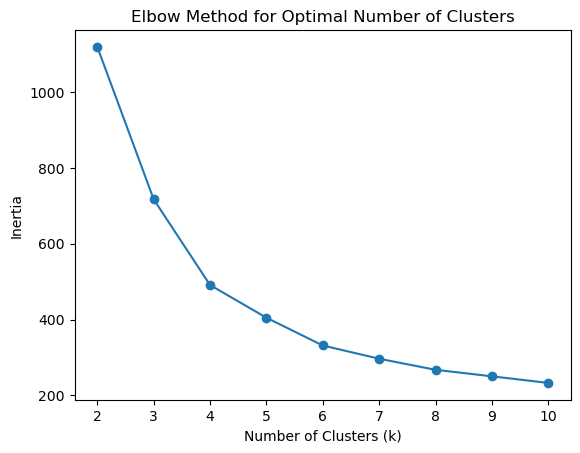

In [385]:
#goign back to the important features found by the random forest classifier, use k-means clustering
#first, determine ideal number of clusters using elbow mthod
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'X_important' is your DataFrame with important features

# Standardize the features
scaler = StandardScaler()
# Fit and transform X_important
X_important_scaled_array = scaler.fit_transform(X_important)

# Convert the scaled array back to a DataFrame with the original column names
X_important_scaled = pd.DataFrame(X_important_scaled_array, columns=X_important.columns)

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Define a range of cluster numbers to test
k_values = range(2, 11)

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_important_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


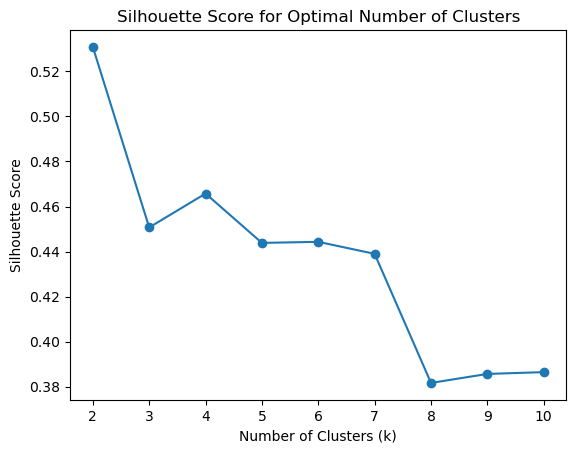

In [386]:
#goign back to the important features found by the random forest classifier, use k-means clustering
#now using silhouette method
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_important_scaled)
    silhouette_scores.append(silhouette_score(X_important_scaled, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


Between the two methods, it seems that k = 4 is a good number of clusters, with a decently clear elbow point local maximum silloutette score

Inertia for k = 4: 491.01819383854115


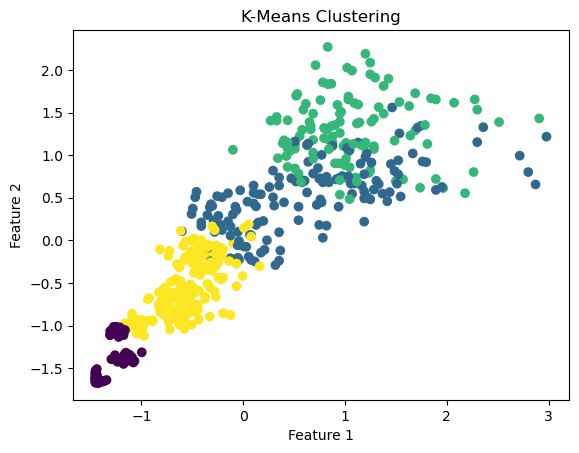

In [387]:
#create kmeans clustering algorithm using k = 4

# Create a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to the scaled data
kmeans.fit(X_important_scaled)

# Add cluster labels to the DataFrame
X_important_scaled['Cluster'] = kmeans.labels_

# Print the inertia value for k = 4 to show the 'success' level
print(f"Inertia for k = 4: {inertia[2]}")

# Visualize the clustering result (for 2D data)
plt.scatter(X_important_scaled.iloc[:, 0], X_important_scaled.iloc[:, 1], c=X_important_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [388]:
#examine clusters
# Extract the 'cluster' column from 'X_important_reduced_scaled'
cluster_column = X_important_scaled['Cluster']

# Merge 'cluster_column' with 'df_relevant' based on the index
df_relevant_important_cluster = pd.merge(df_relevant, cluster_column, left_index=True, right_index=True, how='left')
# Merge 'cluster_column' with 'df_encoded' based on the index
df_encoded = pd.merge(df_encoded, cluster_column, left_index=True, right_index=True, how='left')
df_encoded.rename(columns={'Cluster': 'Cluster (Important)'}, inplace=True)


In [389]:
# Count the occurrences of each cluster for each 'BranchCategory'
cluster_counts_important = df_encoded.groupby(['BranchCategory', 'Cluster (Important)']).size().reset_index(name='count')

# Print the results
print(cluster_counts_important)

              BranchCategory  Cluster (Important)  count
0   Addition Financial Arena                    0     14
1          Altamonte Springs                    1     18
2          Altamonte Springs                    3      1
3                     Apopka                    1      9
4                     Apopka                    2     10
5                   Clermont                    1     19
6            Downtown Campus                    0     19
7               East Orlando                    2     19
8                     Eustis                    3     19
9                  Fern Park                    1     13
10                 Fern Park                    3      6
11                 Kissimmee                    2     19
12                 Lake Mary                    1     19
13                 Lake Nona                    3     19
14                  Leesburg                    3     19
15                  Longwood                    3     19
16            Merritt Island   

In [390]:
# Group by 'cluster' and calculate the mean for each column
average_by_cluster_important = df_encoded.groupby('Cluster (Important)').mean()

# Print the results
print(average_by_cluster_important)

                            ATM  Bill Payment        Cash       Draft  \
Cluster (Important)                                                     
0                     10.447059     18.247059    6.388235   44.776471   
1                    174.028169    571.838028   90.436620  442.176056   
2                    210.222222    484.837607  113.786325  682.119658   
3                     74.101124    161.617978   37.016854  238.168539   

                             ACH         Fee  Credit/Debit Card  Home Banking  \
Cluster (Important)                                                             
0                      78.176471   55.623529         145.317647     46.270588   
1                    1141.408451  511.859155        1992.563380    603.267606   
2                    2061.376068  689.598291        3304.162393    992.615385   
3                     657.196629  263.691011        1123.224719    346.016854   

                        Dividend  Total_Transactions  ...  \
Cluster (Impo

TODO: find important differences between clusters, we can probably remove cluster 1 since it only contains UCF commons and arena which probably are not super relevant

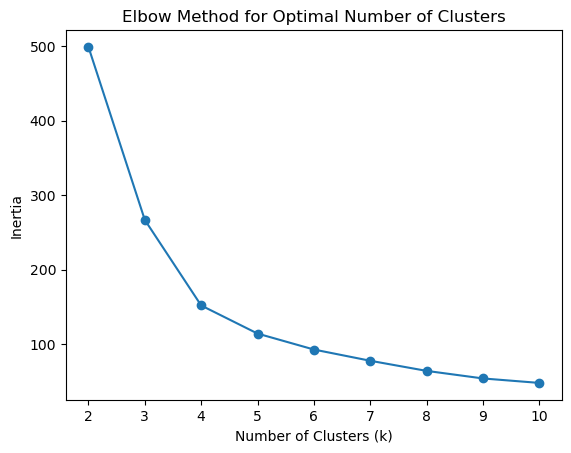

In [391]:
#Same process but with only the 3 most important features, to reduce the curse of dimensionality
X_important_reduced_scaled = X_important_scaled[['Dividend','Fee','Total_Transactions']]

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Define a range of cluster numbers to test
k_values = range(2, 11)

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_important_reduced_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


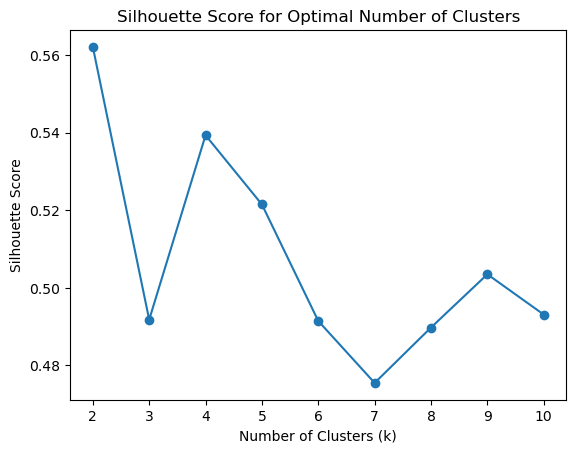

In [392]:
#now using silhouette method
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_important_reduced_scaled)
    silhouette_scores.append(silhouette_score(X_important_reduced_scaled, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


With the reduced features (Dividend, Fee, Total Transactions), our best value of k is still 4.

Inertia for k = 4: 151.7573187198375


C:\Users\danie\AppData\Local\Temp\ipykernel_35692\3526719317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_important_reduced_scaled['Cluster'] = kmeans.labels_


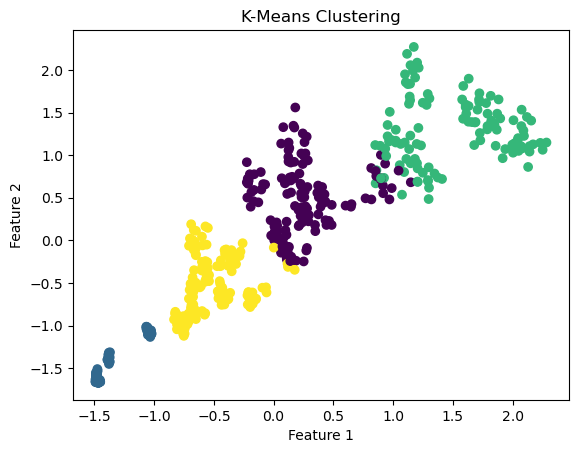

In [393]:
#create kmeans clustering algorithm using k=4
# Create a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to the data
kmeans.fit(X_important_reduced_scaled)

# Add cluster labels to the DataFrame
X_important_reduced_scaled['Cluster'] = kmeans.labels_

# Print the inertia value for k = 4, to show the 'success' level
print(f"Inertia for k = 4: {inertia[2]}")

# Visualize the clustering result (for 2D data)
plt.scatter(X_important_reduced_scaled.iloc[:, 0], X_important_reduced_scaled.iloc[:, 1], c=X_important_reduced_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

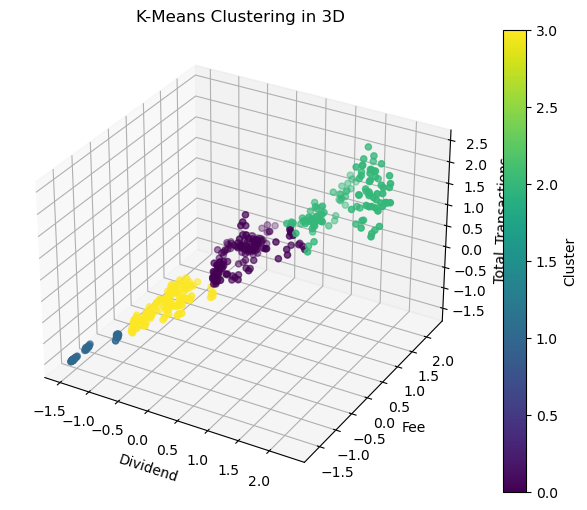

In [394]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Visualize the clustering result in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(X_important_reduced_scaled.iloc[:, 0], X_important_reduced_scaled.iloc[:, 1], X_important_reduced_scaled.iloc[:, 2], c=X_important_reduced_scaled['Cluster'], cmap='viridis')

# Add labels and title
ax.set_xlabel(X_important_reduced_scaled.columns[0])
ax.set_ylabel(X_important_reduced_scaled.columns[1])
ax.set_zlabel(X_important_reduced_scaled.columns[2])
ax.set_title('K-Means Clustering in 3D')

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

We can see the 4 clusters rather clearly, with the green clusters (cluster 2) likely being the best performing branches. In order of assumed best performance (Descending), we have, 2, 0, 3, 1.

In [395]:
#examine clusters
# Extract the 'cluster' column from 'X_important_reduced_scaled'
cluster_column = X_important_reduced_scaled['Cluster']

# Merge 'cluster_column' with 'df_relevant' based on the index
df_relevant_reduced_cluster = pd.merge(df_relevant, cluster_column, left_index=True, right_index=True, how='left')
df_relevant_reduced_cluster

# Merge 'cluster_column' with 'df_encoded' based on the index
df_encoded = pd.merge(df_encoded, cluster_column, left_index=True, right_index=True, how='left')
df_encoded.rename(columns={'Cluster': 'Cluster (Top 3)'}, inplace=True)

In [396]:
# Count the occurrences of each cluster for each 'BranchCategory'
cluster_counts_top3 = df_encoded.groupby(['BranchCategory', 'Cluster (Top 3)']).size().reset_index(name='count')

# Print the results
print(cluster_counts_top3)

              BranchCategory  Cluster (Top 3)  count
0   Addition Financial Arena                1     14
1          Altamonte Springs                0     18
2          Altamonte Springs                3      1
3                     Apopka                0     12
4                     Apopka                2      7
5                   Clermont                0     19
6            Downtown Campus                1     19
7               East Orlando                2     19
8                     Eustis                3     19
9                  Fern Park                0     15
10                 Fern Park                3      4
11                 Kissimmee                2     19
12                 Lake Mary                0     19
13                 Lake Nona                3     19
14                  Leesburg                3     19
15                  Longwood                3     19
16            Merritt Island                1     19
17                 MetroWest                0 

In [397]:
# Group by 'cluster' and calculate the mean for each column
average_by_cluster_top3 = df_encoded.groupby('Cluster (Top 3)').mean()

# Print the results
print(average_by_cluster_top3)

                        ATM  Bill Payment        Cash       Draft  \
Cluster (Top 3)                                                     
0                174.486111    569.423611   89.902778  440.055556   
1                 10.447059     18.247059    6.388235   44.776471   
2                207.572650    482.846154  114.188034  687.820513   
3                 74.352273    160.255682   36.579545  233.795455   

                         ACH         Fee  Credit/Debit Card  Home Banking  \
Cluster (Top 3)                                                             
0                1133.972222  507.590278        1999.576389    602.361111   
1                  78.176471   55.623529         145.317647     46.270588   
2                2088.606838  692.606838        3281.786325    993.282051   
3                 639.676136  262.363636        1122.482955    343.392045   

                    Dividend  Total_Transactions  ...  Average Quarterly Wage  \
Cluster (Top 3)                          

Based on the Cluster (Important) values being close to whole numbers, we can see that our 2 clustering methods yielded very similar results. We will use the Top 3 cluster since the results are similar and a simpler model is prefered. Now analyze by county.

In [398]:
df_encoded

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,...,Monthly Demand Change,County_Brevard,County_Lake,County_Orange,County_Osceola,County_Polk,County_Seminole,County_Volusia,Cluster (Important),Cluster (Top 3)
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,...,0.000000,0,0,1,0,0,0,0,0,1
1,Addition Financial Arena,1,0,0,18,8,24,14,0,13,...,-0.025000,0,0,1,0,0,0,0,0,1
2,Addition Financial Arena,1,0,0,25,2,19,6,2,13,...,-0.128205,0,0,1,0,0,0,0,0,1
3,Addition Financial Arena,0,1,0,18,0,16,5,0,12,...,-0.235294,0,0,1,0,0,0,0,0,1
4,Addition Financial Arena,0,0,0,20,2,15,5,1,9,...,0.000000,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Poinciana,128,138,78,289,460,403,1480,541,2137,...,-0.062760,0,0,0,0,1,0,0,3,3
518,Poinciana,99,105,0,260,0,379,1474,290,2148,...,-0.165221,0,0,0,0,1,0,0,3,3
519,Poinciana,92,165,86,338,691,381,1393,473,2230,...,0.264090,0,0,0,0,1,0,0,3,3
520,Poinciana,122,221,90,304,454,427,1495,519,2256,...,-0.005129,0,0,0,0,1,0,0,3,3


In [399]:
# Extract columns starting with 'County_'
county_columns = df_encoded.filter(like='County_')

# Concatenate 'Cluster (Top 3)' and the selected county columns
concatenated_df = pd.concat([df_encoded['Cluster (Top 3)'], county_columns], axis=1)

# Count occurrences for each county within each 'Cluster (Top 3)'
county_counts = concatenated_df.groupby('Cluster (Top 3)').sum()

# Display the result
print(county_counts)

                 County_Brevard  County_Lake  County_Orange  County_Osceola  \
Cluster (Top 3)                                                               
0                             0           19             54               0   
1                            19            0             47               0   
2                             0            0             79              38   
3                             0           38             38              19   

                 County_Polk  County_Seminole  County_Volusia  
Cluster (Top 3)                                                
0                          0               71               0  
1                          0               19               0  
2                          0                0               0  
3                         19               43              19  


Now rewrite the cluster numbers to be in ascending order based on our top 3 factors (standardized)

In [400]:
# Create a copy of the DataFrame for standardization
df_encoded_copy = df_encoded.copy()

# Select columns for standard scaling
columns_to_scale = ['Dividend', 'Fee', 'Total_Transactions']

# Standard scale the selected columns in the copy
scaler = StandardScaler()
df_encoded_copy[columns_to_scale] = scaler.fit_transform(df_encoded_copy[columns_to_scale])

In [401]:

# Group by 'Cluster' and calculate the average for each group
cluster_means = df_encoded_copy.groupby('Cluster (Top 3)')[columns_to_scale].mean()

# Rename the clusters based on the average values in ascending order
average_order = cluster_means.mean(axis=1).sort_values().index
cluster_mapping = {cluster: new_cluster for cluster, new_cluster in zip(average_order, range(len(average_order)))}
df_encoded_copy['Cluster (Top 3)'] = df_encoded_copy['Cluster (Top 3)'].map(cluster_mapping)

In [402]:
# Extract columns starting with 'County_'
county_columns = df_encoded_copy.filter(like='County_')

# Concatenate 'Cluster (Top 3)' and the selected county columns
concatenated_df = pd.concat([df_encoded_copy['Cluster (Top 3)'], county_columns], axis=1)

# Count occurrences for each county within each 'Cluster (Top 3)'
county_counts = concatenated_df.groupby('Cluster (Top 3)').sum()

# Display the result
print(county_counts)


                 County_Brevard  County_Lake  County_Orange  County_Osceola  \
Cluster (Top 3)                                                               
0                            19            0             47               0   
1                             0           38             38              19   
2                             0           19             54               0   
3                             0            0             79              38   

                 County_Polk  County_Seminole  County_Volusia  
Cluster (Top 3)                                                
0                          0               19               0  
1                         19               43              19  
2                          0               71               0  
3                          0                0               0  


With just a glance, we can see that the counties with the best performing branches are likely Seminole (average value 1.39), Osceola (2.33), and Orange (1.76). Additionally, for Orange County, the 47 instances in cluster 0 are the Addition Financial Arena, UCF Commons, and UCF Downtown, which are not normal branches. If  we remove those from its cluster score, Orange Count now has a an average of 2.24. On top of that, compared to Osceola, Orange County has nearly 9 times the amount of people employed who also make around $4,000 more per quarter ($16,000 per year). This would lead to the conclusion of expanding with another branch in Orange County.